In [ ]:
#@author: Niraj Kumar

In [13]:
#necessary imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio

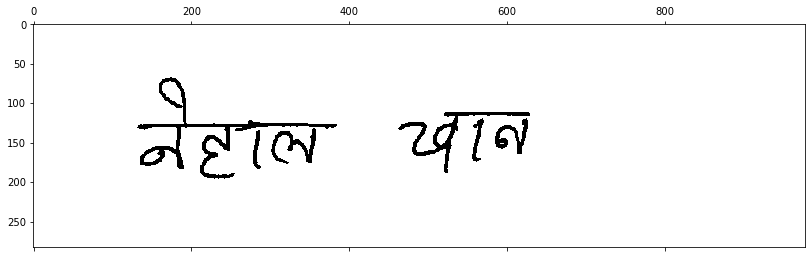

In [51]:
#loading the Signature dataset
path = "./Hindi/"
dir_list = next(os.walk(path))[1]
dir_list.sort()

#segregating genuine and forged signatures
original, forged = [], []
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forged.append(images[:30])
    original.append(images[30:])

In [21]:
for person in original:
    for sign in person:
        im = imageio.imread(original[1][0])

forged_train = forged[:110]
forged_test = forged[110:]

original_train = original[:110]
original_test = original[110:]

plt.matshow(x_[0])

NameError: name 'x_train' is not defined

In [42]:
#reshaping the original dataset images
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [43]:
#defining a model
def get_model():
    sgd = keras.optimizers.SGD(learning_rate=0.001, momentum = 0.1)
    model = keras.Sequential([
                            keras.layers.Dense(256, activation='relu'),
                            keras.layers.Dense(256, activation = 'relu'),
                            keras.layers.Dense(10, input_shape = (784  , ), activation = 'sigmoid')
      ])
    
    model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

Training on the original dataset:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6116 - accuracy: 0.8437
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2772 - accuracy: 0.9203
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2264 - accuracy: 0.9354
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1934 - accuracy: 0.9444
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1692 - accuracy: 0.9516


Orginal Accuracy:
313/313 [==============================] - 1s 1ms/step - loss: 0.1603 - accuracy: 0.9533


Training on the permuted dataset:
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3788 - accuracy: 0.8886
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2170 - accuracy: 0.9367
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1765 - accuracy: 0.9491
Epoch 4/5
187

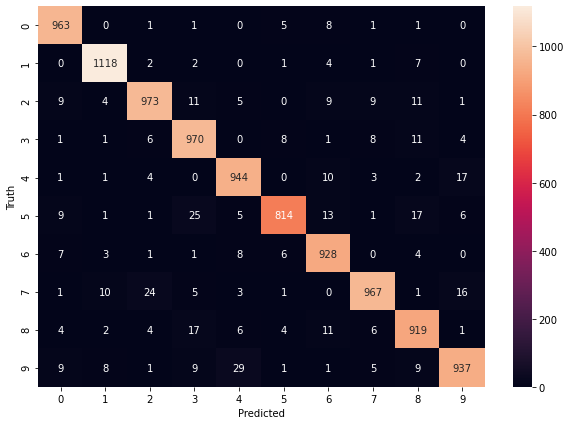

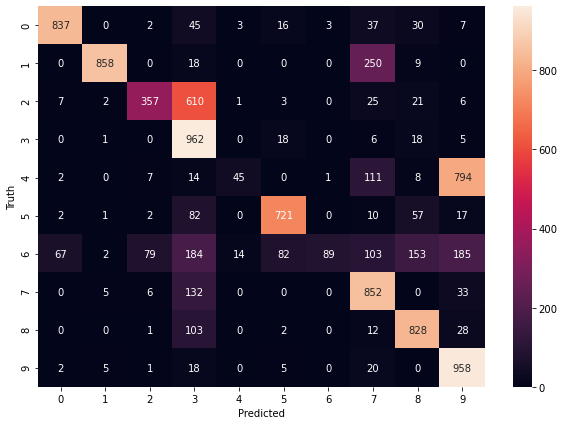

In [44]:
#%%timeit -n1 -r1 
#necessary imports for a confusion matrix
import seaborn as sn

#using a GPU to train and evaluate the model wrt requirements
with tf.device('/GPU:0'):
    model = get_model()
    
    #training the model on original dataset
    print("Training on the original dataset:")
    model.fit(x_train_flattened, y_train, epochs=5)
    print("\n")
    
    #evaluating model before training on permuted dataset
    print("Orginal Accuracy:")
    model.evaluate(x_test_flattened, y_test)
    print("\n")
    
    #creating a confusion matrix
    plt.figure(figsize = (10, 7))
    y_predicted  = model.predict(x_test_flattened)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
    sn.heatmap(cm, annot=True, fmt = 'd')
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    
    #training the same model on permuted data set as well
    print("Training on the permuted dataset:")
    model.fit(train_images_perm, y_train, epochs = 5)
    print("\n")
    
    #evaluating the model after training on the permuted dataset
    print("Accuracy after learning the permuted datatset:")
    model.evaluate(x_test_flattened, y_test)
    print("\n")
    
    #creating the confusion matrix
    plt.figure(figsize = (10, 7))
    y_predicted  = model.predict(x_test_flattened)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
    sn.heatmap(cm, annot=True, fmt = 'd')
    plt.xlabel("Predicted")
    plt.ylabel("Truth")